In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score
pd.options.display.float_format = '{:,.2f}'.format
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/creditcardfraud/creditcard.csv


User Defined Functions

In [2]:
def calculate_statistics_and_make_a_plot(input_data):
    '''this function calculates descriptive statistics of a numeric variable and makes a plot'''
    print(input_data.describe())                                                   #prints descriptive statistiscs
    draw_graph(input_data)                                                         #draw a graph
    
    
def draw_graph(dt):
    ''' this function makes a histogram plot'''
    row_size=22                                                                    #setting row size
    col_size=6                                                                     # setting column size
    fig=plt.figure(figsize=(row_size,col_size))                                    #creating a figure
    ax1=fig.add_subplot(1,2,1)                                                     #adding a subplot
    ax1=plt.hist(dt)                                                               #creating a histogram
    plt.title('{} Distribution'.format(dt.name))                                   #setting a title 
    plt.xlabel(dt.name)                                                            # setting x-axis label
    plt.ylabel('Count')                                                            # setting y-axis label
    
def calculate_statistics_and_make_a_plot_without_extremes(input_data,lower_threshold=0.01,upper_threshold=0.99):
    '''this function calculates descriptive statistics of a numeric variable and makes a plot without top and bottom %1 data'''
    mask=np.logical_and(input_data>input_data.quantile(lower_threshold),           #creating a list for spliting extreme values from the rest
                        input_data<input_data.quantile(upper_threshold))
    calculate_statistics_and_make_a_plot(input_data.loc[mask])                     #calculating descriptive statistics and making plot
            
def mark_extreme_values(input_data,col_list,lower_threshold=0.01,upper_threshold=0.99):
    '''this function marks extreme values.'''
    for col in col_list:                                                           #creating a for loop runs over the col list
        new_col_name=col+'_Is_Extreme'                                             #creating new name for new feature
        input_data[new_col_name]=np.logical_or(input_data[col]<input_data[col].quantile(lower_threshold),  #marking extreme values on a new column
                                                input_data[col]>input_data[col].quantile(upper_threshold))
        input_data[new_col_name]=input_data[new_col_name]*1                        #converting boolean values to numeric
        
def replace_extremes(input_data,col_list,lower_threshold=0.01,upper_threshold=0.99):
    ''' this function replaces extreme values'''
    for col in col_list:                                                           #creating a for loop runs over the col list
        new_value=input_data[col].median()                                         #calculating the median value
        is_extreme=np.logical_or(input_data[col]<input_data[col].quantile(lower_threshold),            #creating a list for spliting extreme values from the rest
                             input_data[col]>input_data[col].quantile(upper_threshold))
        input_data[col][is_extreme]=new_value                                      #replacing extreme values with the median value
    return input_data
        
def remove_extremes(input_data,col_list,lower_threshold=0.01,upper_threshold=0.99):
    '''this function removes extreme values'''
    for col in col_list:                                                           #creating a for loop runs over the col list
        is_extreme=np.logical_or(input_data[col]<input_data[col].quantile(lower_threshold),            #creating a list for spliting extreme values from the rest
                             input_data[col]>input_data[col].quantile(upper_threshold))
        input_data.drop(input_data[is_extreme].index, axis=0,inplace=True)         #removing rows with extreme values
    return input_data
        
def standardize_a_column(data,column):
    '''this function transforms a feature to a standardized feature'''
    data[column]=StandardScaler().fit_transform(data[column].values.reshape(-1,1))  #standardizing a column
    return None

def split_dataset(input_df,col_name):
    '''this function splits the dataset as X and Y'''
    X=input_df.drop(columns=[col_name]).to_numpy()                                  #extracting X
    y=input_df[col_name].to_numpy()                                                 #extracting X
    return X,y

def precision_recall_score(classifier,X,y):
    '''this function calculates precision and recall score'''
    from sklearn.metrics import precision_score,recall_score
    y_pred=classifier.predict(X)                                                    #predict y values
    return precision_score(y_true=y,y_pred=y_pred),recall_score(y_true=y,y_pred=y_pred)               #calculating precision and recall scores

In [3]:
#Reading data
dataset=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# 1-Explanatory Data Analysis

count   284,807.00
mean     94,813.86
std      47,488.15
min           0.00
25%      54,201.50
50%      84,692.00
75%     139,320.50
max     172,792.00
Name: Time, dtype: float64


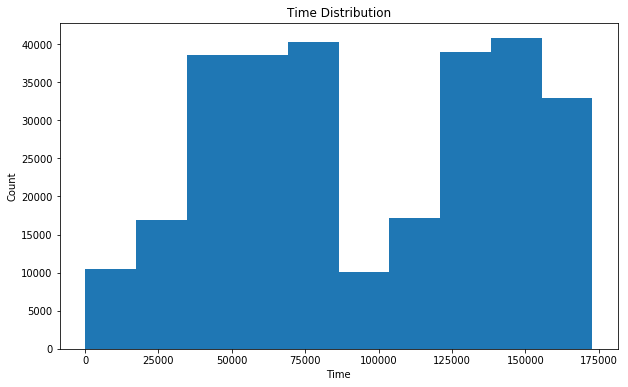

In [4]:
#Time
calculate_statistics_and_make_a_plot(dataset['Time'])                           #calculating descriptive statistics and making graph

In [5]:
#Converting time feature to hours 
dataset['Time-Hour']=[i%24 for i in dataset['Time']/3600]                           #converting seconds to hours
dataset['Time-Hour']=dataset['Time-Hour'].astype(int)                               #converting it to integer
dataset.drop(columns=['Time'],inplace=True)                                         #dropping the old time feature. After having time-hour feature, no need to keep this feature any more.

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           1.96
min         -56.41
25%          -0.92
50%           0.02
75%           1.32
max           2.45
Name: V1, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.08
std           1.58
min          -6.56
25%          -0.90
50%           0.02
75%           1.30
max           2.24
Name: V1, dtype: float64


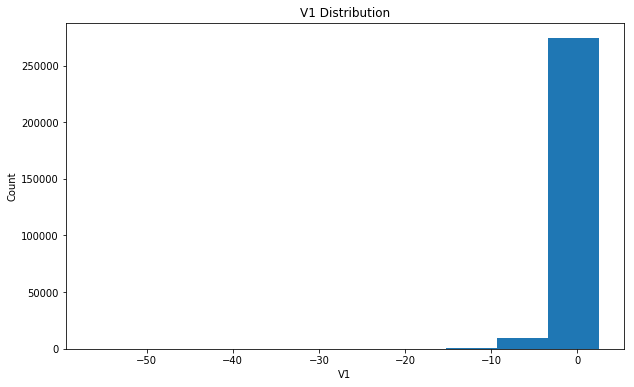

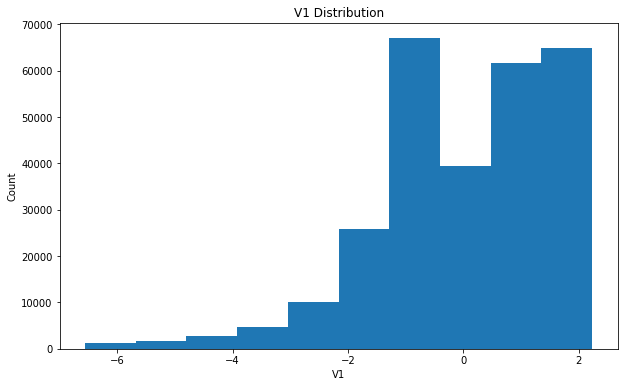

In [6]:
#V1
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V1'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V1'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           1.65
min         -72.72
25%          -0.60
50%           0.07
75%           0.80
max          22.06
Name: V2, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.03
std           1.12
min          -4.96
25%          -0.58
50%           0.07
75%           0.79
max           3.80
Name: V2, dtype: float64


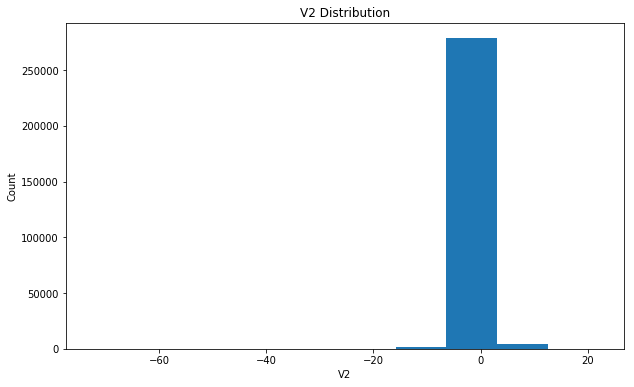

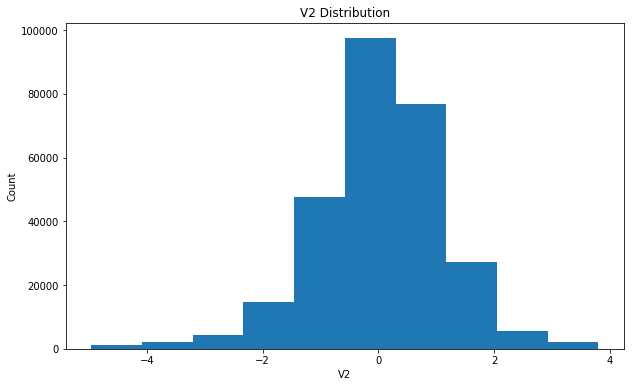

In [7]:
#V2
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V2'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V2'])

Descriptive Statistics

Original Data

count   284,807.00
mean         -0.00
std           1.52
min         -48.33
25%          -0.89
50%           0.18
75%           1.03
max           9.38
Name: V3, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.04
std           1.30
min          -3.98
25%          -0.86
50%           0.18
75%           1.01
max           2.73
Name: V3, dtype: float64


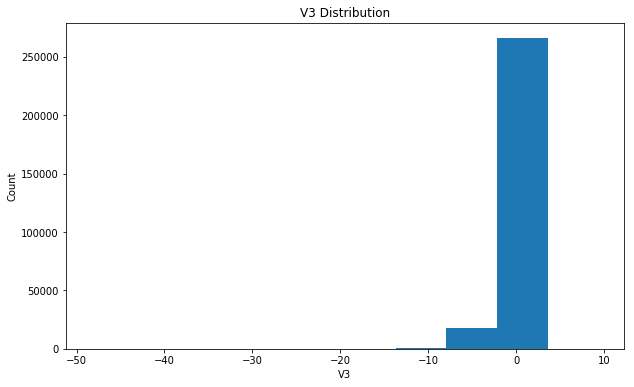

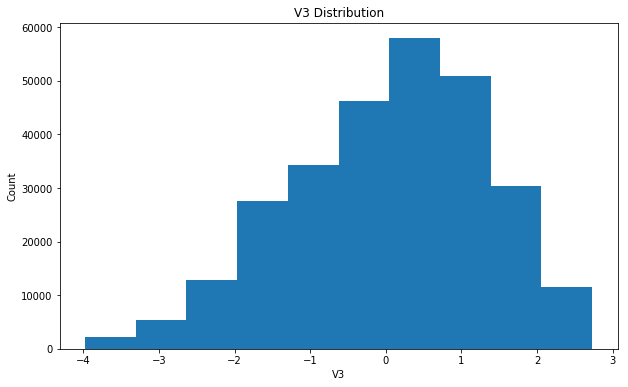

In [8]:
#V3
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V3'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V3'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           1.42
min          -5.68
25%          -0.85
50%          -0.02
75%           0.74
max          16.88
Name: V4, dtype: float64

Data Without Extremes

count   279,109.00
mean         -0.02
std           1.28
min          -3.12
25%          -0.83
50%          -0.02
75%           0.72
max           4.25
Name: V4, dtype: float64


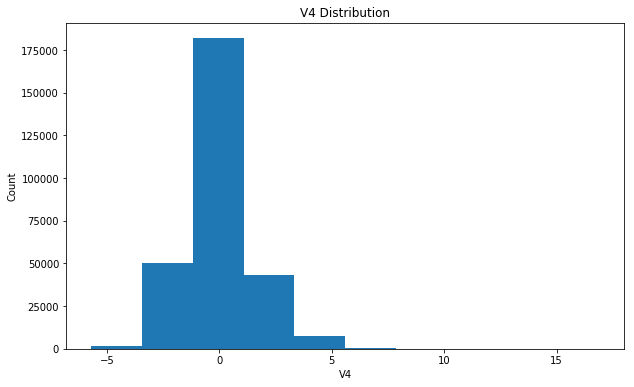

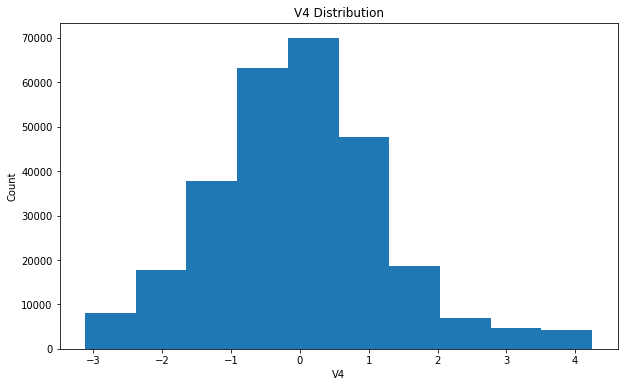

In [9]:
#V4
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V4'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V4'])

Descriptive Statistics

Original Data

count   284,807.00
mean         -0.00
std           1.38
min        -113.74
25%          -0.69
50%          -0.05
75%           0.61
max          34.80
Name: V5, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.00
std           1.04
min          -3.06
25%          -0.68
50%          -0.05
75%           0.60
max           3.42
Name: V5, dtype: float64


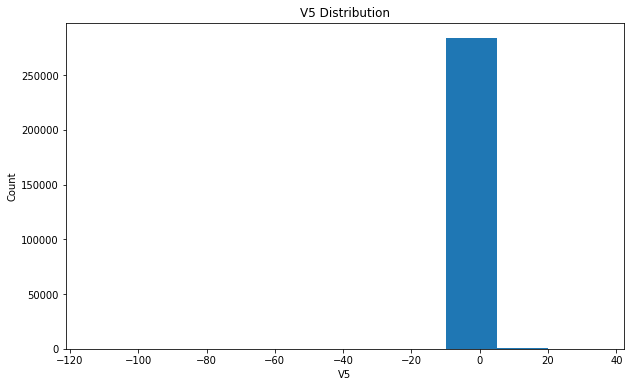

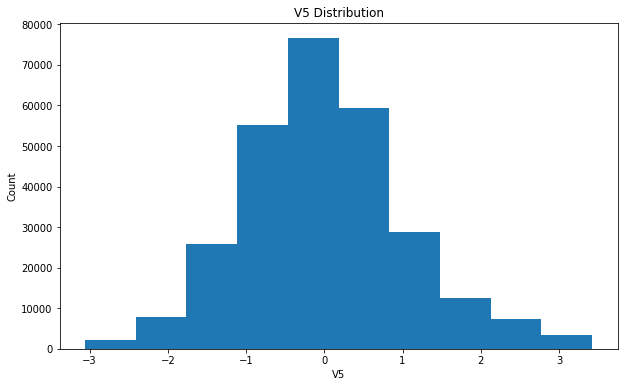

In [10]:
#V5
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V5'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V5'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           1.33
min         -26.16
25%          -0.77
50%          -0.27
75%           0.40
max          73.30
Name: V6, dtype: float64

Data Without Extremes

count   279,109.00
mean         -0.02
std           1.16
min          -2.12
25%          -0.76
50%          -0.27
75%           0.38
max           4.20
Name: V6, dtype: float64


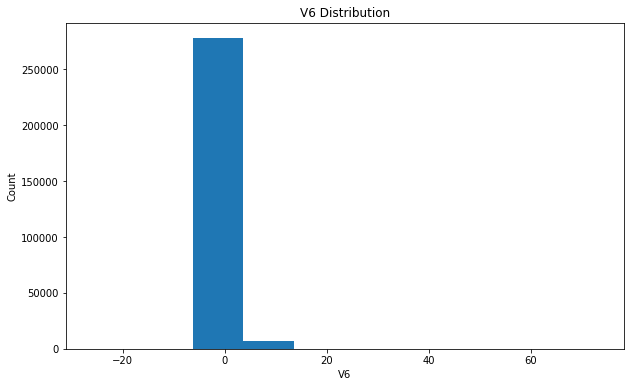

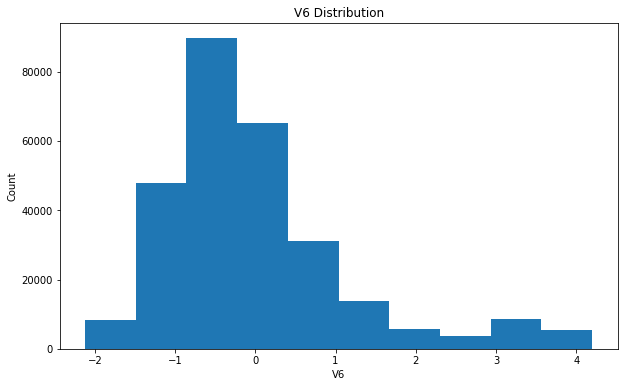

In [11]:
#V6
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V6'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V6'])

Descriptive Statistics

Original Data

count   284,807.00
mean         -0.00
std           1.24
min         -43.56
25%          -0.55
50%           0.04
75%           0.57
max         120.59
Name: V7, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.01
std           0.82
min          -3.01
25%          -0.54
50%           0.04
75%           0.56
max           2.69
Name: V7, dtype: float64


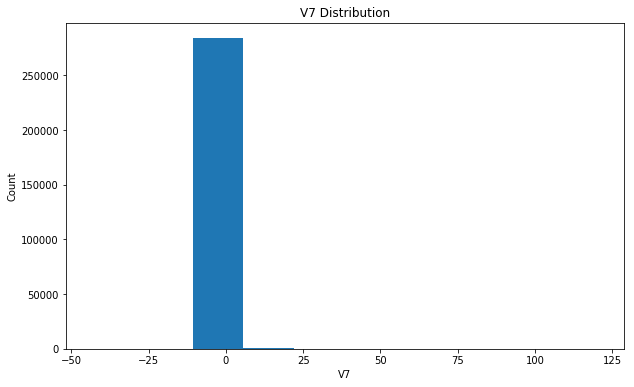

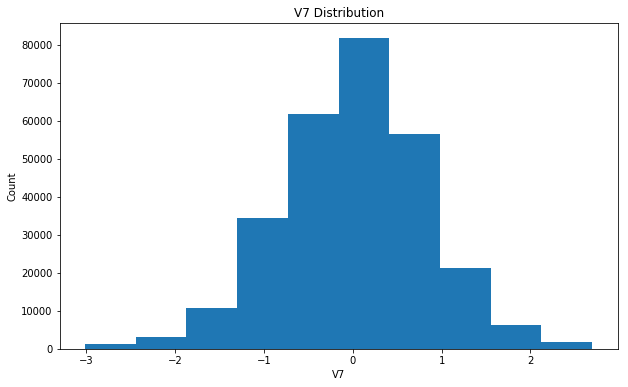

In [12]:
#V7
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V7'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V7'])

Descriptive Statistics

Original Data

count   284,807.00
mean         -0.00
std           1.19
min         -73.22
25%          -0.21
50%           0.02
75%           0.33
max          20.01
Name: V8, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.04
std           0.61
min          -4.03
25%          -0.20
50%           0.02
75%           0.32
max           2.08
Name: V8, dtype: float64


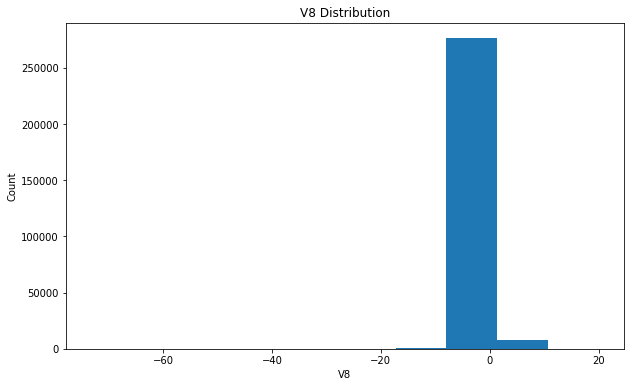

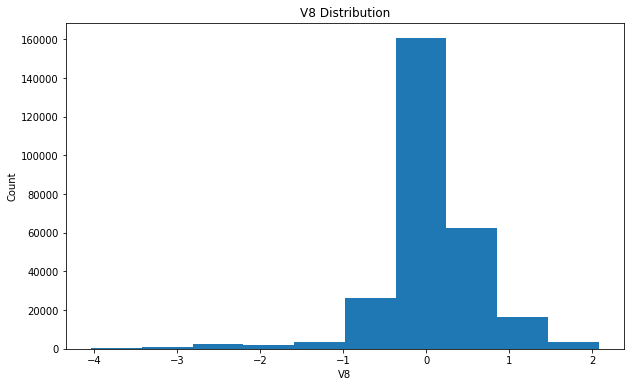

In [13]:
#V8
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V8'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V8'])

Descriptive Statistics

Original Data

count   284,807.00
mean         -0.00
std           1.10
min         -13.43
25%          -0.64
50%          -0.05
75%           0.60
max          15.59
Name: V9, dtype: float64

Data Without Extremes

count   279,107.00
mean         -0.01
std           0.97
min          -2.46
25%          -0.63
50%          -0.05
75%           0.58
max           2.99
Name: V9, dtype: float64


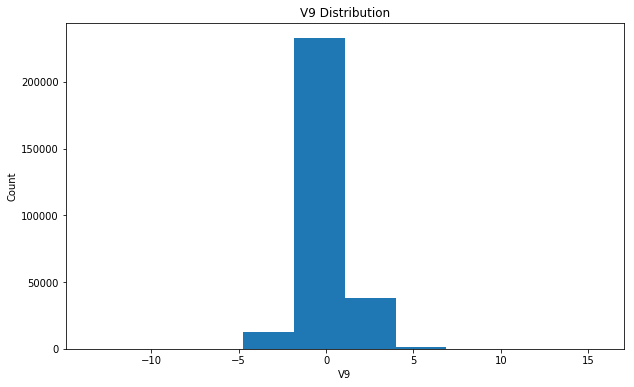

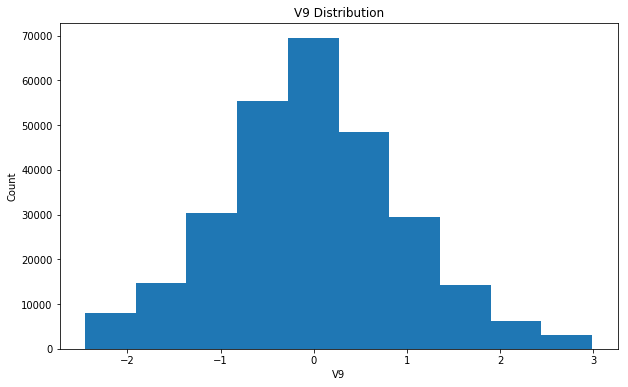

In [14]:
#V9
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V9'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V9'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           1.09
min         -24.59
25%          -0.54
50%          -0.09
75%           0.45
max          23.75
Name: V10, dtype: float64

Data Without Extremes

count   279,109.00
mean         -0.02
std           0.80
min          -2.09
25%          -0.52
50%          -0.09
75%           0.43
max           3.25
Name: V10, dtype: float64


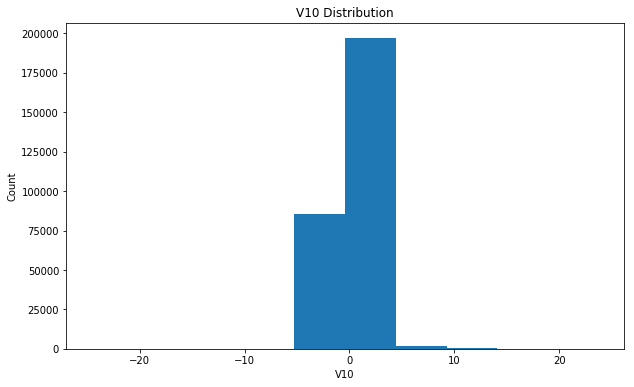

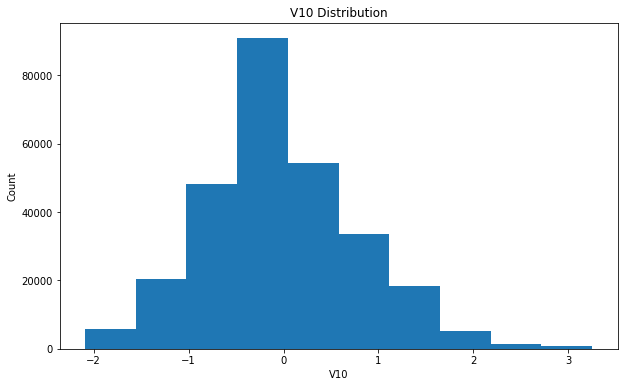

In [15]:
#V10
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V10'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V10'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           1.02
min          -4.80
25%          -0.76
50%          -0.03
75%           0.74
max          12.02
Name: V11, dtype: float64

Data Without Extremes

count   279,109.00
mean         -0.01
std           0.95
min          -2.09
25%          -0.75
50%          -0.03
75%           0.72
max           2.29
Name: V11, dtype: float64


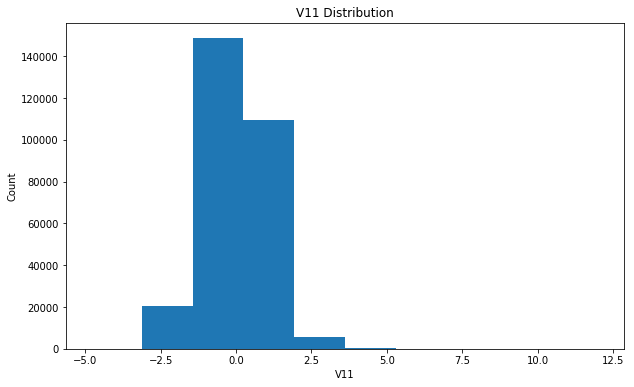

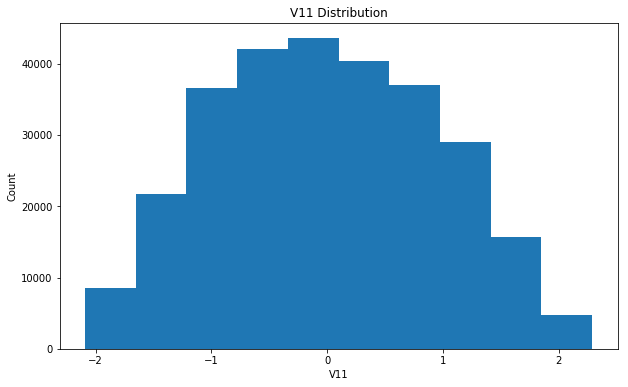

In [16]:
#V11
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V11'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V11'])

Descriptive Statistics

Original Data

count   284,807.00
mean         -0.00
std           1.00
min         -18.68
25%          -0.41
50%           0.14
75%           0.62
max           7.85
Name: V12, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.02
std           0.86
min          -3.06
25%          -0.39
50%           0.14
75%           0.61
max           1.70
Name: V12, dtype: float64


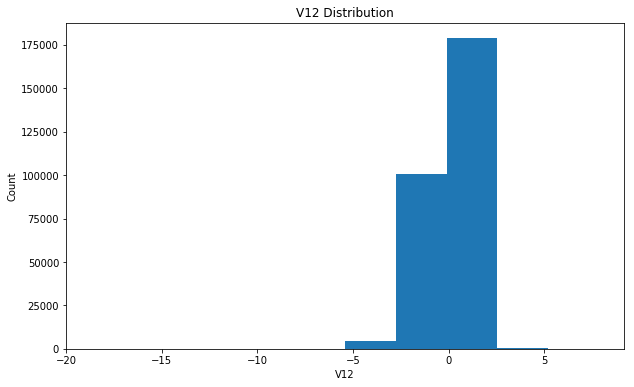

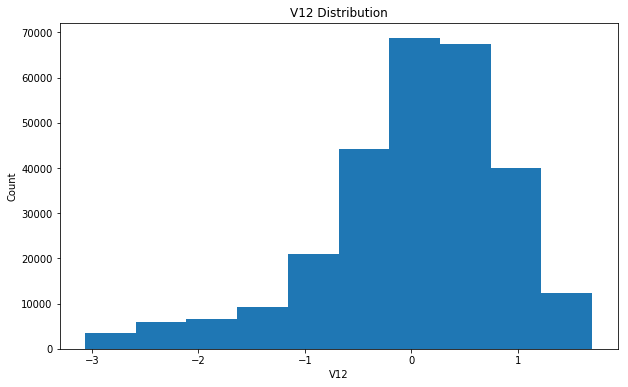

In [17]:
#V12
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V12'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V12'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           1.00
min          -5.79
25%          -0.65
50%          -0.01
75%           0.66
max           7.13
Name: V13, dtype: float64

Data Without Extremes

count   279,109.00
mean         -0.00
std           0.92
min          -2.28
25%          -0.63
50%          -0.01
75%           0.65
max           2.51
Name: V13, dtype: float64


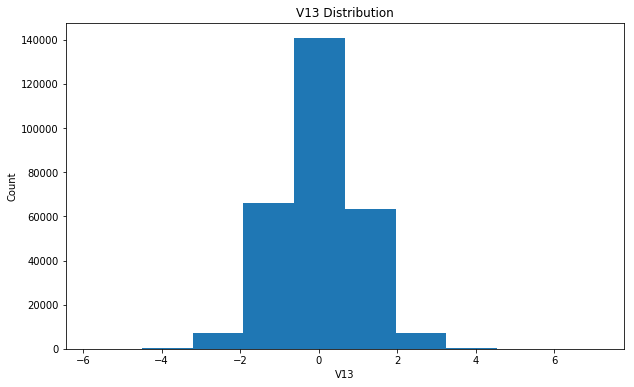

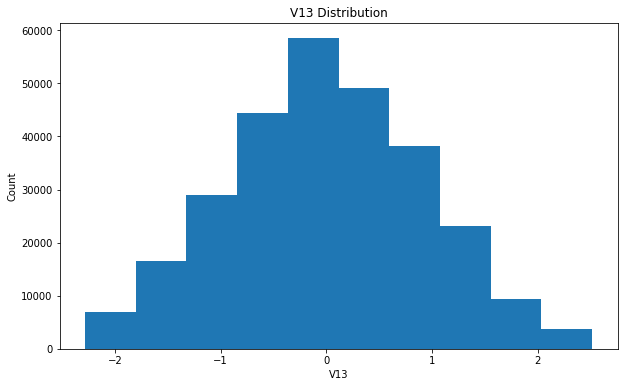

In [18]:
#V13
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V13'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V13'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           0.96
min         -19.21
25%          -0.43
50%           0.05
75%           0.49
max          10.53
Name: V14, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.02
std           0.77
min          -2.80
25%          -0.41
50%           0.05
75%           0.48
max           2.15
Name: V14, dtype: float64


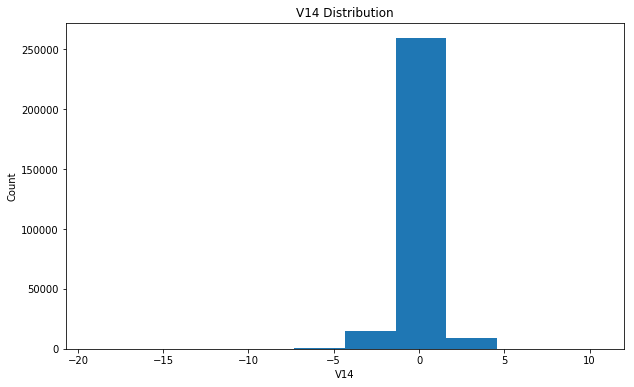

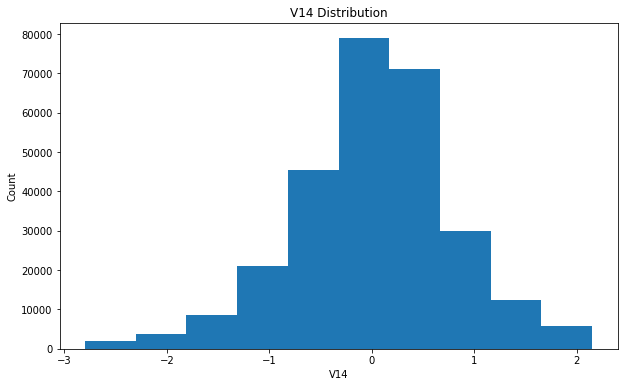

In [19]:
#V14
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V14'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V14'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           0.92
min          -4.50
25%          -0.58
50%           0.05
75%           0.65
max           8.88
Name: V15, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.00
std           0.85
min          -2.38
25%          -0.57
50%           0.05
75%           0.63
max           1.93
Name: V15, dtype: float64


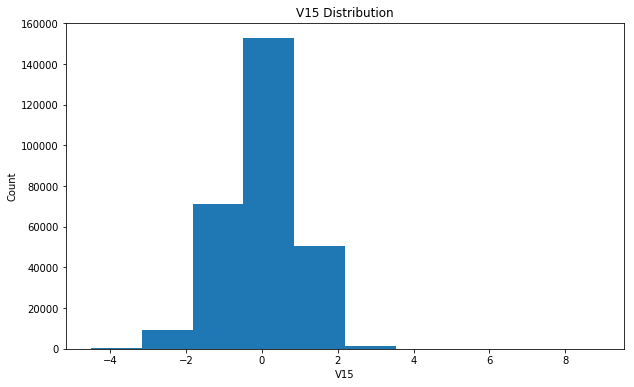

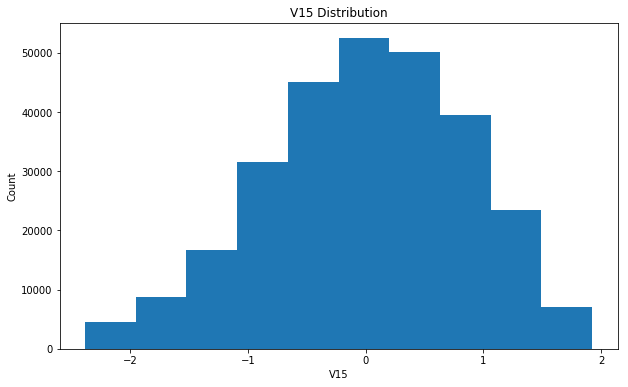

In [20]:
#V15
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V15'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V15'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           0.88
min         -14.13
25%          -0.47
50%           0.07
75%           0.52
max          17.32
Name: V16, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.01
std           0.77
min          -2.38
25%          -0.46
50%           0.07
75%           0.51
max           1.87
Name: V16, dtype: float64


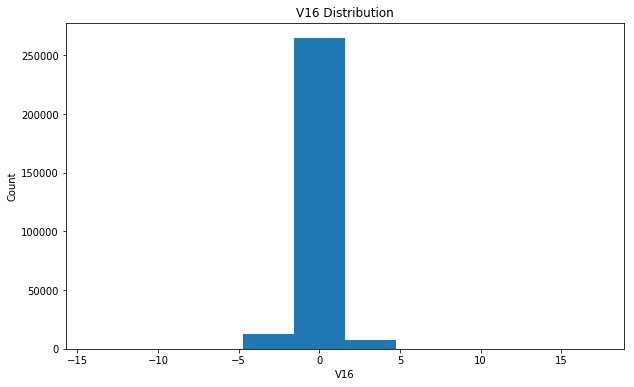

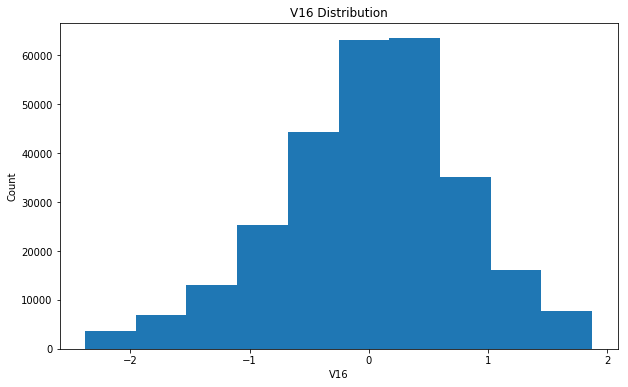

In [21]:
#V16
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V16'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V16'])

Descriptive Statistics

Original Data

count   284,807.00
mean         -0.00
std           0.85
min         -25.16
25%          -0.48
50%          -0.07
75%           0.40
max           9.25
Name: V17, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.00
std           0.76
min          -2.15
25%          -0.49
50%          -0.00
75%           0.49
max           2.07
Name: V18, dtype: float64


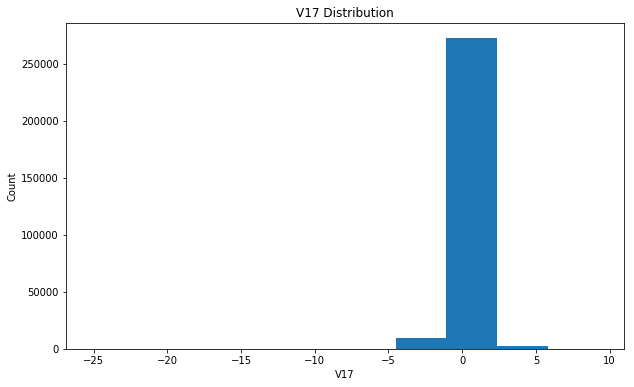

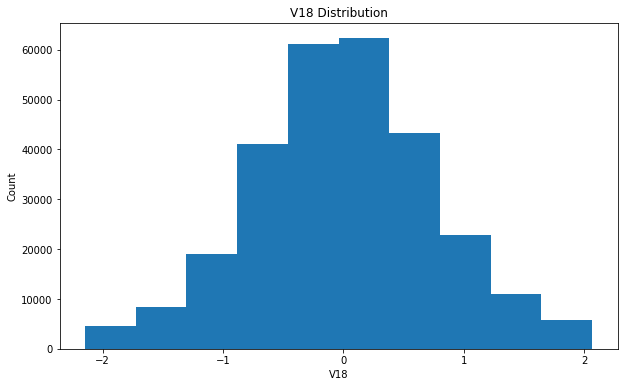

In [22]:
#V17
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V17'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V18'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           0.84
min          -9.50
25%          -0.50
50%          -0.00
75%           0.50
max           5.04
Name: V18, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.00
std           0.76
min          -2.15
25%          -0.49
50%          -0.00
75%           0.49
max           2.07
Name: V18, dtype: float64


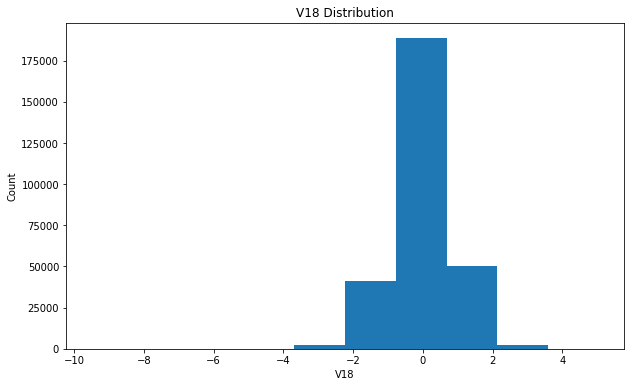

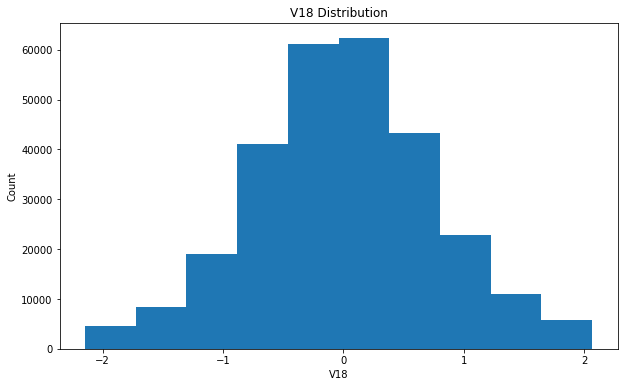

In [23]:
#V18
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V18'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V18'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           0.81
min          -7.21
25%          -0.46
50%           0.00
75%           0.46
max           5.59
Name: V19, dtype: float64

Data Without Extremes

count   279,109.00
mean         -0.00
std           0.73
min          -2.08
25%          -0.45
50%           0.00
75%           0.45
max           2.26
Name: V19, dtype: float64


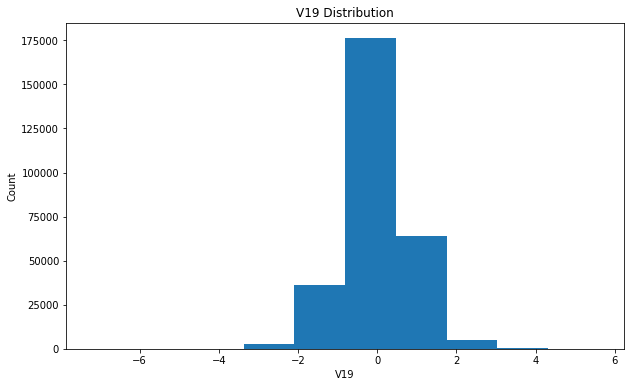

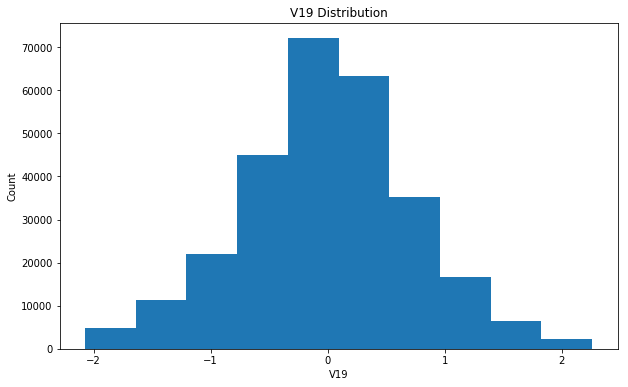

In [24]:
#V19
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V19'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V19'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           0.77
min         -54.50
25%          -0.21
50%          -0.06
75%           0.13
max          39.42
Name: V20, dtype: float64

Data Without Extremes

count   279,109.00
mean         -0.00
std           0.42
min          -1.57
25%          -0.21
50%          -0.06
75%           0.13
max           2.41
Name: V20, dtype: float64


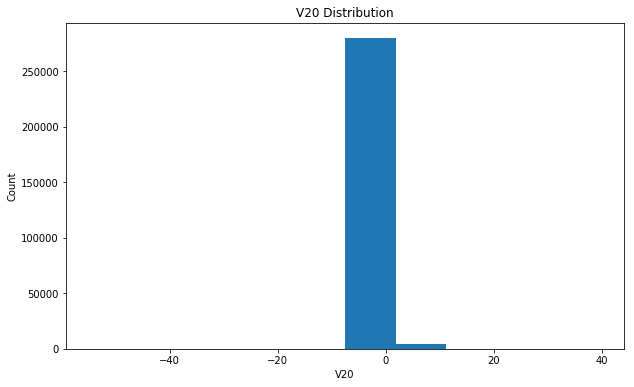

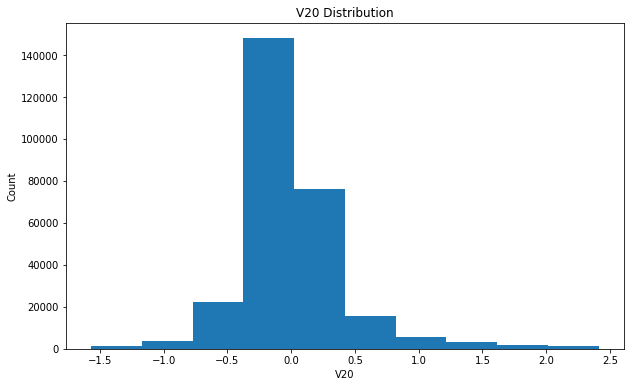

In [25]:
#V20
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V20'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V20'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           0.73
min         -34.83
25%          -0.23
50%          -0.03
75%           0.19
max          27.20
Name: V21, dtype: float64

Data Without Extremes

count   279,109.00
mean         -0.01
std           0.34
min          -1.47
25%          -0.22
50%          -0.03
75%           0.18
max           1.93
Name: V21, dtype: float64


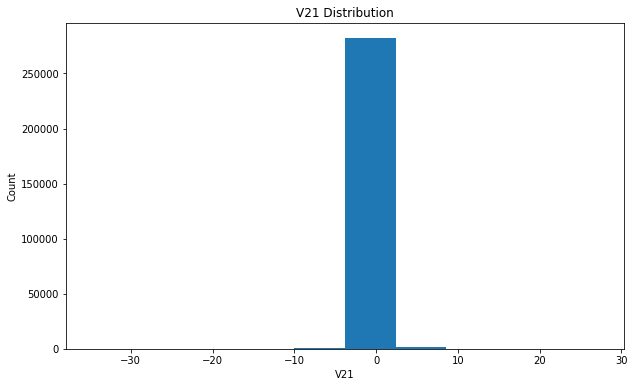

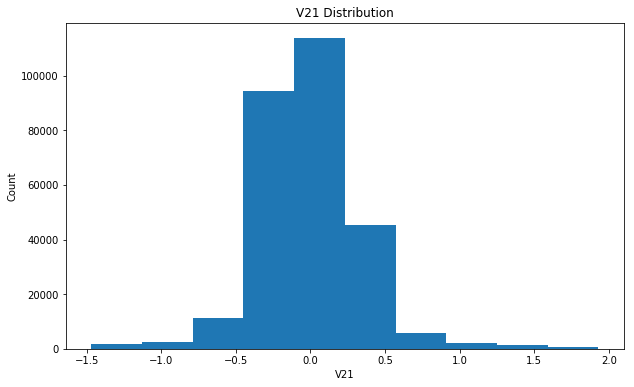

In [26]:
#V21
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V21'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V21'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           0.73
min         -10.93
25%          -0.54
50%           0.01
75%           0.53
max          10.50
Name: V22, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.00
std           0.66
min          -1.65
25%          -0.53
50%           0.01
75%           0.52
max           1.53
Name: V22, dtype: float64


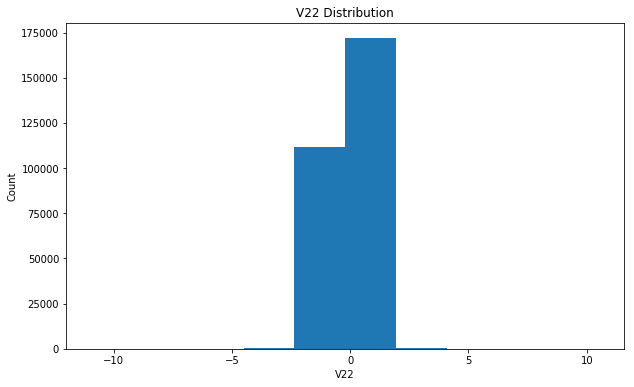

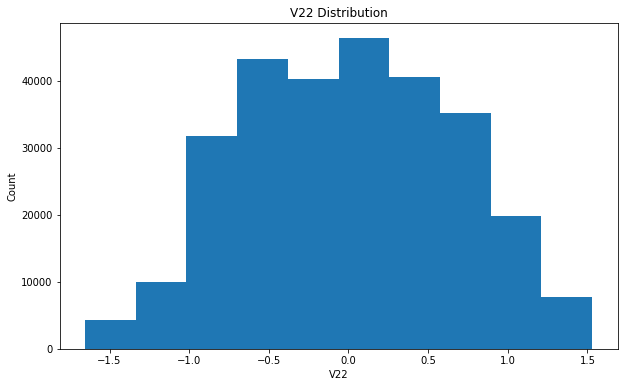

In [27]:
#V22
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V22'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V22'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           0.62
min         -44.81
25%          -0.16
50%          -0.01
75%           0.15
max          22.53
Name: V23, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.00
std           0.29
min          -1.19
25%          -0.16
50%          -0.01
75%           0.14
max           1.51
Name: V23, dtype: float64


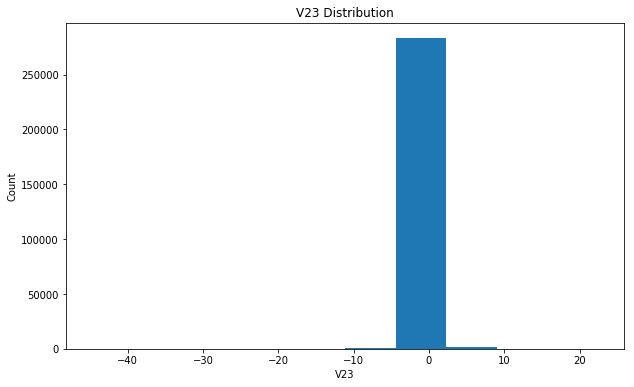

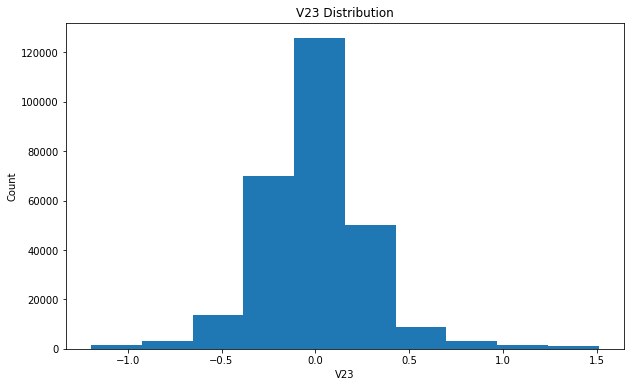

In [28]:
#V23
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V23'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V23'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           0.61
min          -2.84
25%          -0.35
50%           0.04
75%           0.44
max           4.58
Name: V24, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.01
std           0.57
min          -1.66
25%          -0.35
50%           0.04
75%           0.43
max           1.06
Name: V24, dtype: float64


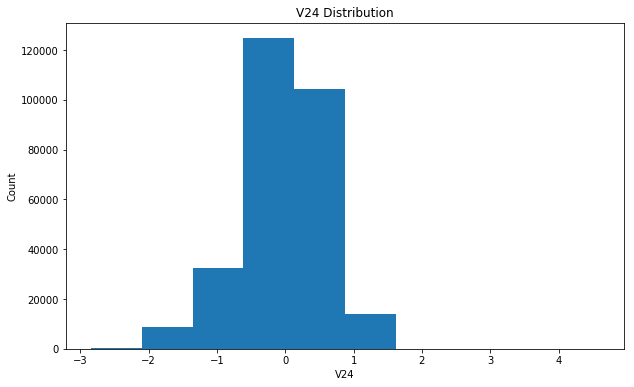

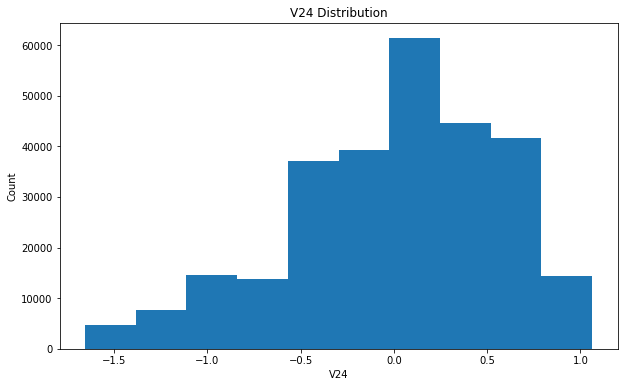

In [29]:
#V24
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V24'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V24'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           0.52
min         -10.30
25%          -0.32
50%           0.02
75%           0.35
max           7.52
Name: V25, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.00
std           0.46
min          -1.42
25%          -0.31
50%           0.02
75%           0.34
max           1.20
Name: V25, dtype: float64


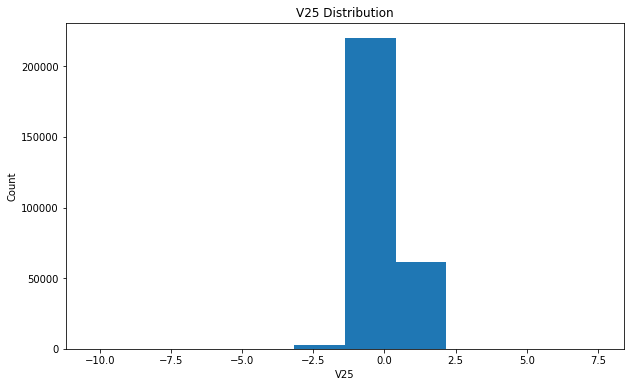

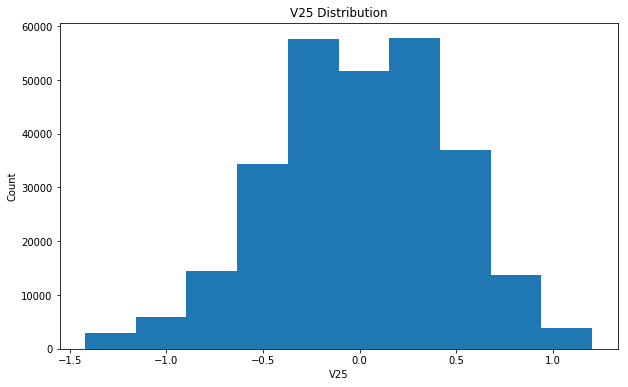

In [30]:
#V25
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V25'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V25'])

Descriptive Statistics

Original Data

count   284,807.00
mean          0.00
std           0.48
min          -2.60
25%          -0.33
50%          -0.05
75%           0.24
max           3.52
Name: V26, dtype: float64

Data Without Extremes

count   279,109.00
mean         -0.00
std           0.45
min          -1.01
25%          -0.32
50%          -0.05
75%           0.23
max           1.16
Name: V26, dtype: float64


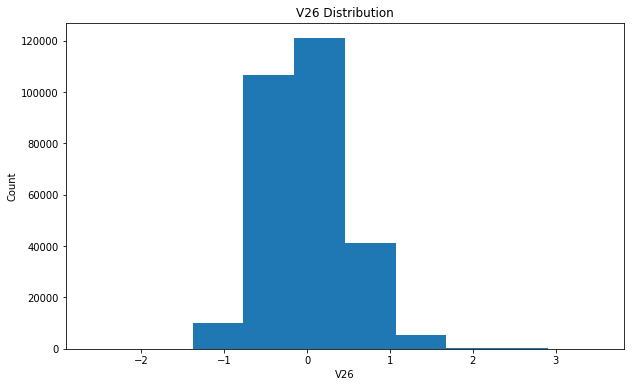

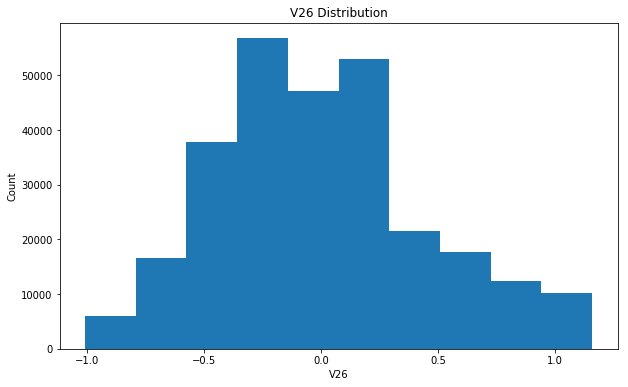

In [31]:
#V26
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V26'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V26'])

Descriptive Statistics

Original Data

count   284,807.00
mean         -0.00
std           0.40
min         -22.57
25%          -0.07
50%           0.00
75%           0.09
max          31.61
Name: V27, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.01
std           0.23
min          -1.25
25%          -0.07
50%           0.00
75%           0.09
max           0.93
Name: V27, dtype: float64


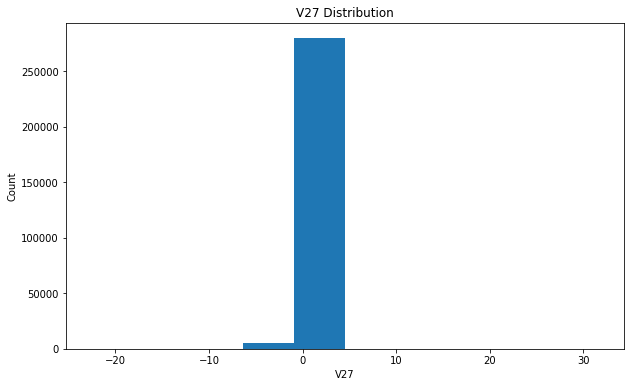

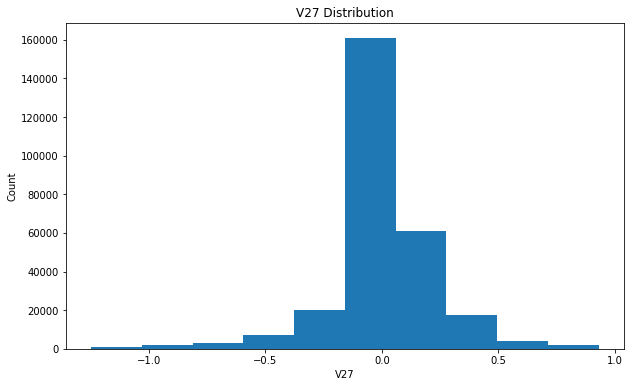

In [32]:
#V27
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V27'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V27'])

Descriptive Statistics

Original Data

count   284,807.00
mean         -0.00
std           0.33
min         -15.43
25%          -0.05
50%           0.01
75%           0.08
max          33.85
Name: V28, dtype: float64

Data Without Extremes

count   279,109.00
mean          0.00
std           0.16
min          -0.88
25%          -0.05
50%           0.01
75%           0.08
max           0.54
Name: V28, dtype: float64


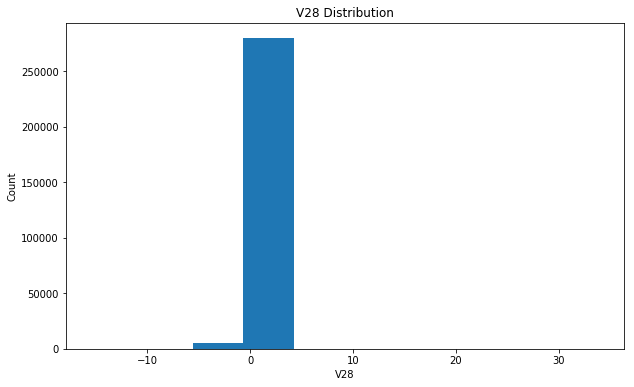

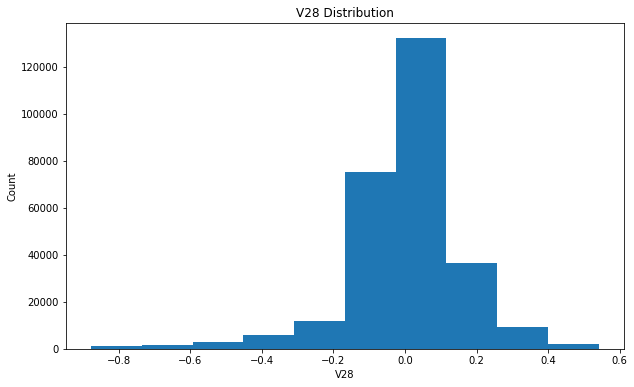

In [33]:
#V28
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['V28'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['V28'])

Descriptive Statistics

Original Data

count   284,807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max      25,691.16
Name: Amount, dtype: float64

Data Without Extremes

count   254,499.00
mean         37.37
std          45.77
min           0.01
25%           4.81
50%          17.40
75%          52.28
max         202.99
Name: Amount, dtype: float64


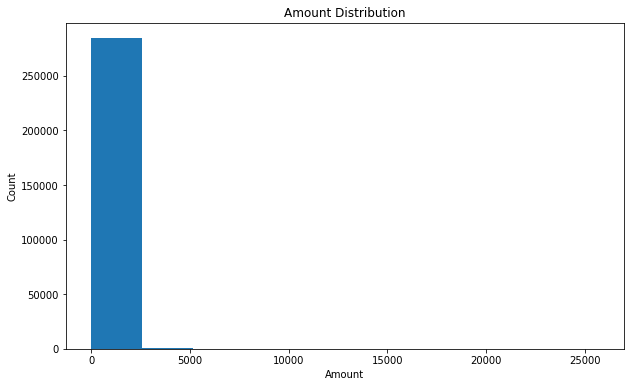

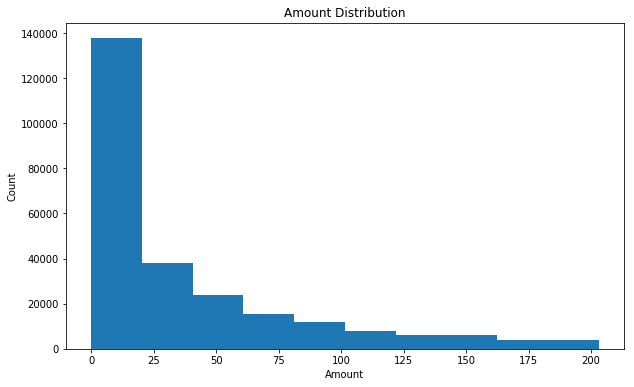

In [34]:
#Amount
print('Descriptive Statistics\n')
print('Original Data\n')
calculate_statistics_and_make_a_plot(dataset['Amount'])
print('\nData Without Extremes\n')
calculate_statistics_and_make_a_plot_without_extremes(dataset['Amount'],lower_threshold=0,upper_threshold=0.9)

In [35]:
#Target Variable
print('Value Counts')
print(dataset['Class'].value_counts())
print('\nFraund Ratio:{:.3f}'.format(dataset['Class'].mean()))

Value Counts
0    284315
1       492
Name: Class, dtype: int64

Fraund Ratio:0.002


# 2- Preparing Data for Predictive Modelling

In [36]:
features_with_extreme_values=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11','V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
                              'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
#dataset_v1:Amount feature is standardized.
dataset_v1=dataset.copy()                                                       # creating a copy of dataset.
standardize_a_column(data=dataset_v1,column='Amount')                           # standardizing "Amount" feature.

#dataset_v2
#Amount feature is standardized+Extreme values are flagged
dataset_v2=dataset.copy()                                                       # creating a copy of dataset.
standardize_a_column(data=dataset_v2,column='Amount')                           # standardizing "Amount" feature.
mark_extreme_values(input_data=dataset_v2,                                      # marking extreme values
                    col_list=features_with_extreme_values,
                    lower_threshold=0,upper_threshold=0.99)
#dataset_v3
#Amount feature is standardized+Extreme values are removed
dataset_v3=dataset.copy()                                                       # creating a copy of dataset.
standardize_a_column(data=dataset_v3,column='Amount')                           # standardizing "Amount" feature.
dataset_v3_refined=remove_extremes(dataset_v3,features_with_extreme_values)     # removing extreme values

#dataset_v4
#Amount feature is standardized+Extreme values are replaced with median.
dataset_v4=dataset_v2.copy()                                                    # creating a copy of dataset.
standardize_a_column(data=dataset_v4,column='Amount')                           # standardizing "Amount" feature.
replace_extremes(dataset_v4,features_with_extreme_values)                       # replacing extreme values with median

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20_Is_Extreme,V21_Is_Extreme,V22_Is_Extreme,V23_Is_Extreme,V24_Is_Extreme,V25_Is_Extreme,V26_Is_Extreme,V27_Is_Extreme,V28_Is_Extreme,Amount_Is_Extreme
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,0,0,0,0,0,0,0,0,0,0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,0,0,0,0,0,0,0,0,0,0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0,0,0,0,0,0,0,0,0,0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,0,0,0,0,0,0,0,0,0,0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.02,0.07,0.18,-2.07,-0.05,-0.27,0.04,0.02,1.91,-0.09,...,0,0,0,0,0,1,0,1,1,0
284803,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.29,0.58,-0.98,...,0,0,0,0,0,0,0,0,0,0
284804,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.71,0.43,-0.48,...,0,0,0,0,0,0,0,0,0,0
284805,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.68,0.39,-0.40,...,0,0,0,0,0,0,0,0,0,0


# 3- Predictive Modelling

In [37]:
#in this section, I work on 4 different datasets and find classifiers to predict fraud cases. 
#As I am doing that, I also compare effect of different extreme value replacement techniques on predictive modelling process.
#I have run and found parameters of logistic regression and decision tree on my own with grid search cv and use them directly below.

classifier_dict=pd.DataFrame(columns=['Classifier','Precision_score','Recall_score'])   #creating a dataframe to store models' results

#1st dataset: dataset_v1 --> dataset + Amount feature standardizated and no extreme values modification
X,y=split_dataset(dataset_v1,'Class')                                                     #splitting the features as dependent(y) and independent variables(X).
logistic_regression_1=LogisticRegression(C=0.1,class_weight=None, dual=False,             #creating a logistic regression classifier
                                         fit_intercept=True,intercept_scaling=1,l1_ratio=0.1, 
                                         max_iter=10,multi_class='warn', n_jobs=None, 
                                         penalty='elasticnet',random_state=None, solver='saga', 
                                         tol=0.0001,verbose=0,warm_start=False)
logistic_regression_1.fit(X,y)                                                             #fitting the logistic regression classifier
precision_score,recall_score=precision_recall_score(logistic_regression_1,X,y)             #calculating precision (hit ratio) and recall (get ratio) scores
classifier_dict.loc['logistic_regression_1']=[logistic_regression_1,precision_score,recall_score] #saving the results in the dataframe
decision_tree_1=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,   #creating a decision tree classifier
                                       max_features=0.8, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0, min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=0.001,
                                       min_weight_fraction_leaf=0.0, presort=False,
                                       random_state=123, splitter='best')
decision_tree_1.fit(X,y)                                                                          #fitting the decision tree classifier
precision_score,recall_score=precision_recall_score(decision_tree_1,X,y)                          #calculating precision (hit ratio) and recall (get ratio) scores
classifier_dict.loc['decision_tree_1']=[decision_tree_1,precision_score,recall_score]             #saving results in the dataframe

#2nd dataset: dataset_v2  --> dataset + Amount feature standardized + Extreme values flagged
X,y=split_dataset(dataset_v2,'Class')                                                             #splitting the features as dependent(y) and independent variables(X).
logistic_regression_2=LogisticRegression(C=100, class_weight=None, dual=False,                    #creating a logistic regression classifier 
                                       fit_intercept=True, intercept_scaling=1, l1_ratio=0.7, 
                                       max_iter=10, multi_class='warn', n_jobs=None, 
                                       penalty='elasticnet', random_state=None, solver='saga', 
                                       tol=0.0001, verbose=0, warm_start=False)
logistic_regression_2.fit(X,y)                                                                    #fitting the logistic regression classifier
precision_score,recall_score=precision_recall_score(logistic_regression_2,X,y)                    #calculating precision (hit ratio) and recall (get ratio) scores
classifier_dict.loc['logistic_regression_2']=[logistic_regression_2,precision_score,recall_score] #saving the results in the dataframe
decision_tree_2=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,          #creating a decision tree classifier
                                       max_features=0.5, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0, min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=0.001,
                                       min_weight_fraction_leaf=0.0, presort=False,
                                       random_state=123, splitter='best')
decision_tree_2.fit(X,y)                                                                          #fitting the decision tree classifier
precision_score,recall_score=precision_recall_score(decision_tree_2,X,y)                          #calculating precision (hit ratio) and recall (get ratio) scores
classifier_dict.loc['decision_tree_2']=[decision_tree_2,precision_score,recall_score]             #saving results in the dataframe

#3rd dataset: dataset_v3 --> dataset+Amount feature standardized + Extreme values are removed
X,y=split_dataset(dataset_v3,'Class')                                                             #splitting the features as dependent(y) and independent variables(X).
logistic_regression_3=LogisticRegression(C=0.01, class_weight=None, dual=False,                   #creating a logistic regression classifier  
                                       fit_intercept=True, intercept_scaling=1, l1_ratio=0.1, 
                                       max_iter=10, multi_class='warn', n_jobs=None, 
                                       penalty='elasticnet', random_state=None, solver='saga', 
                                       tol=0.0001, verbose=0, warm_start=False)

logistic_regression_3.fit(X,y)                                                                    #fitting the logistic regression classifier
precision_score,recall_score=precision_recall_score(logistic_regression_3,X,y)                    #calculating precision (hit ratio) and recall (get ratio) scores
classifier_dict.loc['logistic_regression_3']=[logistic_regression_3,precision_score,recall_score] #saving the results in the dataframe
decision_tree_3=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,          #creating a decision tree classifier
                                       max_features=0.1, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0, min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=0.1,
                                       min_weight_fraction_leaf=0.0, presort=False,
                                       random_state=123, splitter='best')
decision_tree_3.fit(X,y)                                                                          #fitting the decision tree classifier
precision_score,recall_score=precision_recall_score(decision_tree_3,X,y)                          #calculating precision (hit ratio) and recall (get ratio) scores
classifier_dict.loc['decision_tree_3']=[decision_tree_3,precision_score,recall_score]             #saving results in the dataframe



#4rd dataset: dataset_v4--> dataset+Amount feature standardized + Extreme values are replaced with median.
X,y=split_dataset(dataset_v4,'Class')                                                             #splitting the features as dependent(y) and independent variables(X).
logistic_regression=LogisticRegression(C=10, class_weight=None, dual=False,                       #creating a logistic regression classifier  
                                       fit_intercept=True, intercept_scaling=1, l1_ratio=0.7, 
                                       max_iter=10, multi_class='warn', n_jobs=None, 
                                       penalty='elasticnet', random_state=None, solver='saga', 
                                       tol=0.0001, verbose=0, warm_start=False)
logistic_regression.fit(X,y)                                                                      #fitting the logistic regression classifier
precision_score,recall_score=precision_recall_score(logistic_regression,X,y)                      #calculating precision (hit ratio) and recall (get ratio) scores
classifier_dict.loc['logistic_regression_4']=[logistic_regression,precision_score,recall_score]   #saving the results in the dataframe
decision_tree_4=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,          #creating a decision tree classifier
                                       max_features=0.8, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0, min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=0.001,
                                       min_weight_fraction_leaf=0.0, presort=False,
                                       random_state=123, splitter='best')
decision_tree_4.fit(X,y)                                                                          #fitting the decision tree classifier
precision_score,recall_score=precision_recall_score(decision_tree_4,X,y)                          #calculating precision (hit ratio) and recall (get ratio) scores
classifier_dict.loc['decision_tree_4']=[decision_tree_4,precision_score,recall_score]             #saving results in the dataframe

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 du

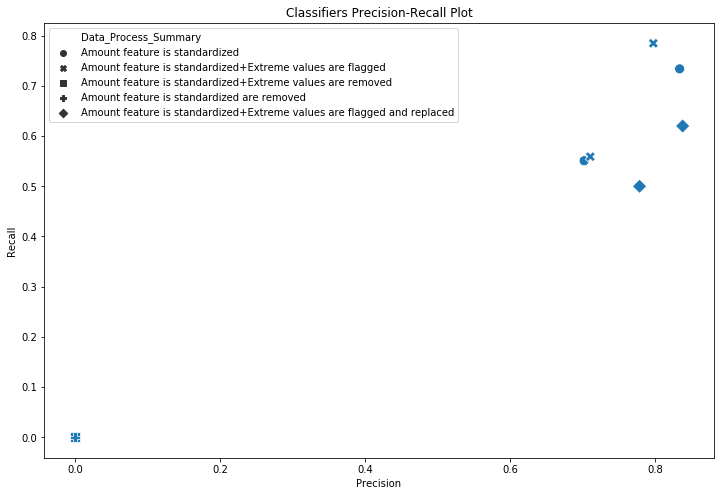

In [38]:
#creating a plot to compare results easier
#creating a new feature for dataset information.
classifier_dict.loc['logistic_regression_1','Data_Process_Summary']='Amount feature is standardized'
classifier_dict.loc['decision_tree_1','Data_Process_Summary']='Amount feature is standardized'
classifier_dict.loc['logistic_regression_2','Data_Process_Summary']='Amount feature is standardized+Extreme values are flagged'
classifier_dict.loc['decision_tree_2','Data_Process_Summary']='Amount feature is standardized+Extreme values are flagged'
classifier_dict.loc['logistic_regression_3','Data_Process_Summary']='Amount feature is standardized+Extreme values are removed'
classifier_dict.loc['decision_tree_3','Data_Process_Summary']='Amount feature is standardized are removed'
classifier_dict.loc['logistic_regression_4','Data_Process_Summary']='Amount feature is standardized+Extreme values are flagged and replaced'
classifier_dict.loc['decision_tree_4','Data_Process_Summary']='Amount feature is standardized+Extreme values are flagged and replaced'
#make a plot
plt.figure(figsize=(12,8))
sns.scatterplot(x='Precision_score',y='Recall_score',data=classifier_dict,style='Data_Process_Summary',s=100)
plt.title('Classifiers Precision-Recall Plot')
plt.xlabel('Precision')
plt.ylabel('Recall');